In [7]:
!pip3 install pandas numpy sodapy matplotlib

  Using cached matplotlib-3.10.7-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp313-cp313-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp313-cp313-manylinux1_x86_64.manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_5_x86_64.whl.metadata (112 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (6.3 kB)
  Using cached pillow-12.0.0-cp313-cp313-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (8.8 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.7-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (8.7 MB)
Using cached contourpy-1.3.3-cp313-cp313-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (362 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.60.1-cp313-cp

In [2]:
import pandas as pd
from sodapy import Socrata

In [4]:
client = Socrata("data.cityofchicago.org", None)
results = client.get("ijzp-q8t2", limit=350000, order="date DESC", where="primary_type IN ('ROBBERY', 'BURGLARY', 'DECEPTIVE PRACTICE', 'MOTOR VEHICLE THEFT', 'CRIMINAL TRESPASS')")
results_df = pd.DataFrame.from_records(results)
results_df.to_csv("./data/chicago_crime_data.csv", index=False)

In [5]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350000 entries, 0 to 349999
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    350000 non-null  object
 1   case_number           350000 non-null  object
 2   date                  350000 non-null  object
 3   block                 350000 non-null  object
 4   iucr                  350000 non-null  object
 5   primary_type          350000 non-null  object
 6   description           350000 non-null  object
 7   location_description  342360 non-null  object
 8   arrest                350000 non-null  bool  
 9   domestic              350000 non-null  bool  
 10  beat                  350000 non-null  object
 11  district              350000 non-null  object
 12  ward                  349994 non-null  object
 13  community_area        349980 non-null  object
 14  fbi_code              350000 non-null  object
 15  x_coordinate     

(5,)


<Axes: xlabel='primary_type'>

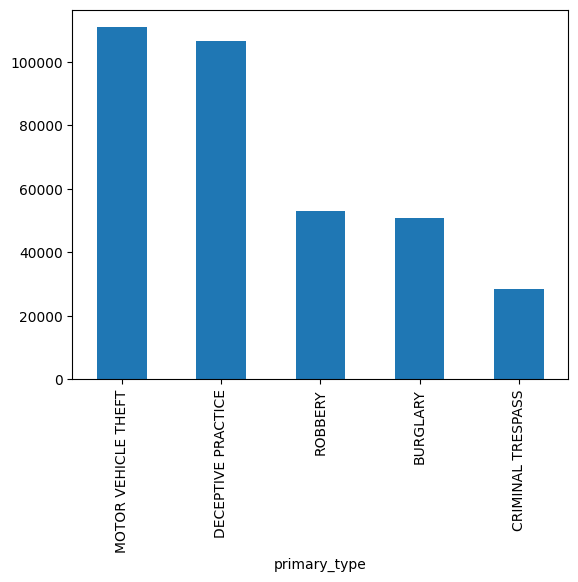

In [8]:
print(results_df['primary_type'].unique().shape)
results_df['primary_type'].value_counts().plot(kind='bar')